### Changing K

In this notebook, you will get some practice using different values of k in the k-means algorithm, and see how this changes the clusters that are observed in the data.  You'll also get excperience determining what the best value for k might be for a dataset.

To get started, let's read in our necessary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import helpers2 as h
import tests as t
from IPython import display

%matplotlib inline

# Make the images larger
plt.rcParams['figure.figsize'] = (16, 9)

`1.` To get started, there is a function called **simulate_data** within the **helpers2** module.  Read the documentation on the function by running the cell below.  Then use the function to simulate a dataset with 200 data points (rows), 5 features (columns), and 4 centers

In [ ]:
h.simulate_data?

In [2]:
data = h.simulate_data(n=200, features=5, centroids=4)
# Create a dataset with 200 points, 5 features and 4 centers

# This will check that your dataset appears to match ours before moving forward
t.test_question_1(data)

Looks good!  Continue!


`2.` Because of how you set up the data, what should the value of **k** be?

In [3]:
k_value = 4
# What should the value of k be?

# Check your solution against ours.
t.test_question_2(k_value)

That's right!  The value of k is the same as the number of centroids used to create your dataset.


`3.` Let's try a few different values for **k** and fit them to our data using **KMeans**.

To use KMeans, you need to follow three steps:

**I.** Instantiate your model.

**II.** Fit your model to the data.

**III.** Predict the labels for the data.

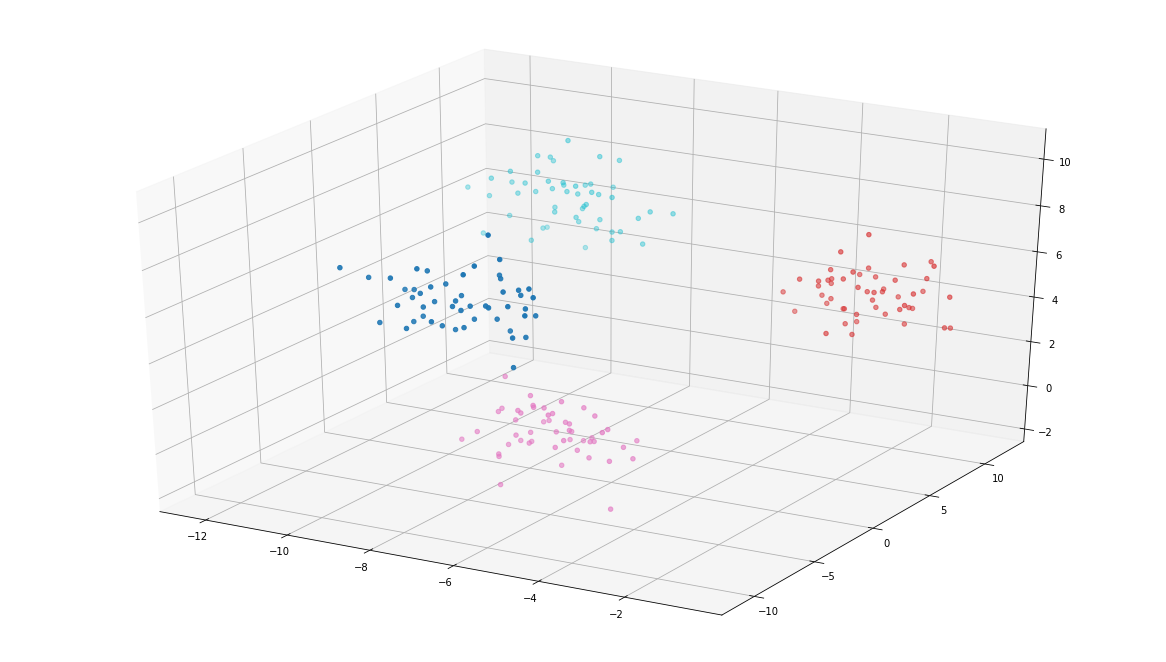

In [4]:
# Try instantiating a model with 4 centers
kmeans_4 = KMeans(n_clusters=4)
#instantiate your model

# Then fit the model to your data using the fit method
model_4 = kmeans_4.fit(data)
#fit the model to your data using kmeans_4

# Finally predict the labels on the same data to show the category that point belongs to
labels_4 = model_4.predict(data) 
#predict labels using model_4 on your dataset

# If you did all of that correctly, this should provide a plot of your data colored by center
h.plot_data(data, labels_4)

`4.` Now try again, but this time fit kmeans using 2 clusters instead of 4 to your data.

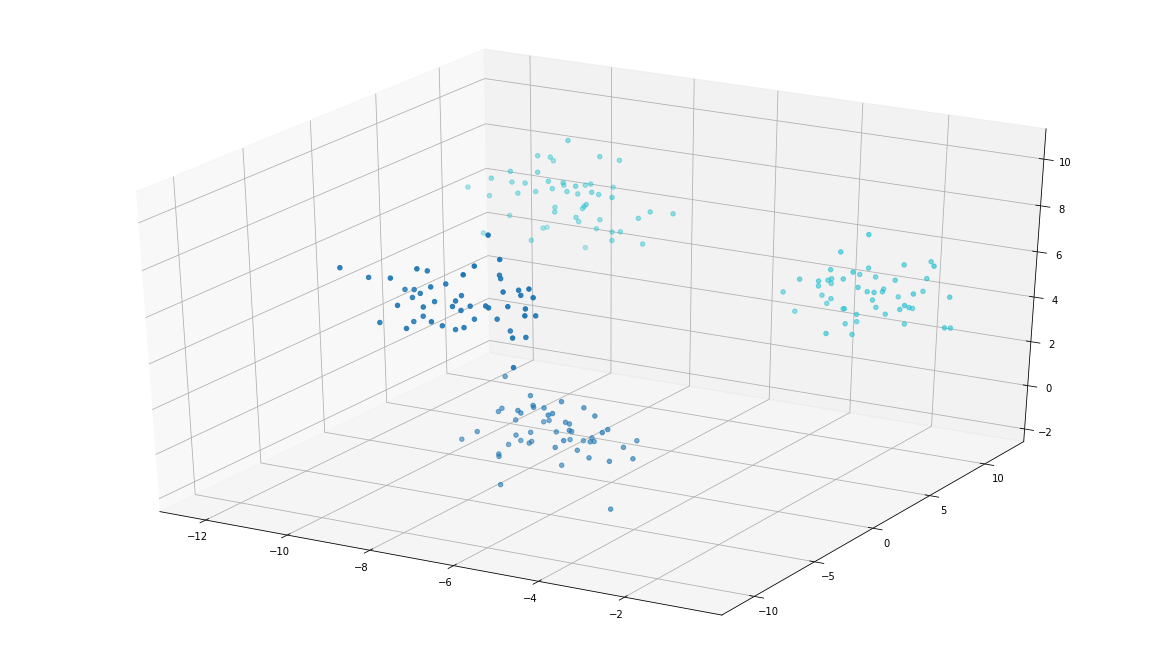

In [5]:
# Try instantiating a model with 2 centers
kmeans_2 = KMeans(n_clusters=2)

# Then fit the model to your data using the fit method
model_2 = kmeans_2.fit(data)

# Finally predict the labels on the same data to show the category that point belongs to
labels_2 = model_2.predict(data)

# If you did all of that correctly, this should provide a plot of your data colored by center
h.plot_data(data, labels_2)

`5.` Now try one more time, but with the number of clusters in kmeans to 7.

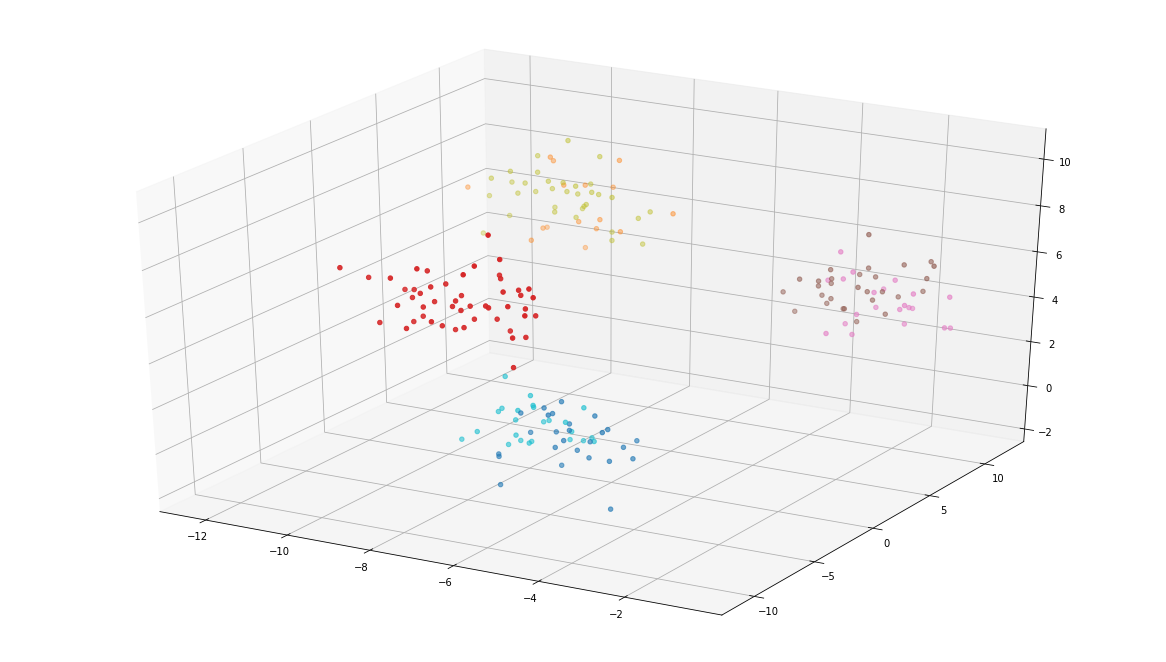

In [6]:
# Try instantiating a model with 7 centers
kmeans_7 = KMeans(n_clusters=7)

# Then fit the model to your data using the fit method
model_7 = kmeans_7.fit(data)

# Finally predict the labels on the same data to show the category that point belongs to
labels_7 = model_7.predict(data)

# If you did all of that correctly, this should provide a plot of your data colored by center
h.plot_data(data, labels_7)

Visually, we get some indication of how well our model is doing, but it isn't totally apparent. Each time additional centers are considered, the distances between the points and the center will decrease.  However, at some point, that decrease is not substantial enough to suggest the need for an additional cluster.  

Using a scree plot is a common method for understanding if an additional cluster center is needed.  The elbow method used by looking at a scree plot is still pretty subjective, but let's take a look to see how many cluster centers might be indicated.
_________

`6.` Once you have **fit** a kmeans model to some data in sklearn, there is a **score** method, which takes the data.  This score is an indication of how far the points are from the centroids.  By fitting models for centroids from 1-10, and keeping track of the score and the number of centroids, you should be able to build a scree plot.  

This plot should have the number of centroids on the x-axis, and the absolute value of the score result on the y-axis.  You can see the plot I retrieved by running the solution code.  Try creating your own scree plot, as you will need it for the final questions.

model  1  score=  -22432.034560222564
model  2  score=  -7663.387505455155
model  3  score=  -3808.96772432797
model  4  score=  -936.5582127707125
model  5  score=  -880.6594497880009
model  6  score=  -829.4299326541363
model  7  score=  -789.4507357967043
model  8  score=  -755.5269585860744
model  9  score=  -710.7105102069023
model  10  score=  -688.095784386997
[22432.03456022  7663.38750546  3808.96772433   936.55821277
   880.65944979   829.42993265   789.4507358    755.52695859
   710.71051021   688.09578439]
[ 1  2  3  4  5  6  7  8  9 10]


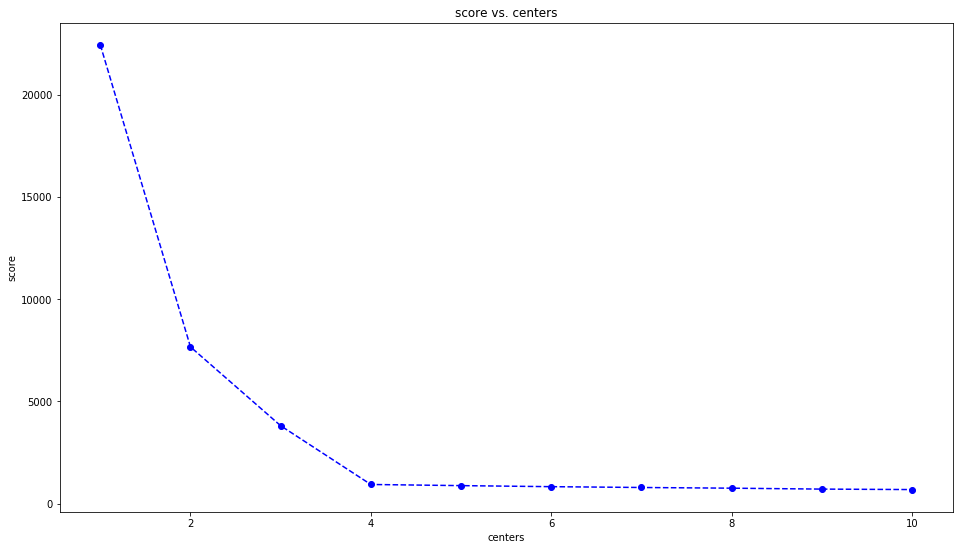

In [7]:
# A place for your work - create a scree plot - you will need to
# Fit a kmeans model with changing k from 1-10
# Obtain the score for each model (take the absolute value)
# Plot the score against k
score = np.empty((0,9), float)
centers = np.empty((0,9), int)
for k in range(1,11):
    kmeans_k = KMeans(n_clusters=k)
    model_k = kmeans_k.fit(data)
    labels_k = model_k.predict(data)
    score = np.append(score, -model_k.score(data))
    centers = np.append(centers, k)
    print('model ',k,' score= ',model_k.score(data))
print(score)
print(centers)
plt.plot(centers, score, linestyle='--', marker='o', color='b');
plt.xlabel('centers');
plt.ylabel('score');
plt.title('score vs. centers');

model  2  score=  0.596471451052983
model  3  score=  0.6547932190737532
model  4  score=  0.7493226806873509
model  5  score=  0.6119463109442089
model  6  score=  0.45963277005010894
model  7  score=  0.32178914203437303
model  8  score=  0.47576434079010455
model  9  score=  0.1849289125309748
model  10  score=  0.1704084368366174
[0.59647145 0.65479322 0.74932268 0.61194631 0.45963277 0.32178914
 0.47576434 0.18492891 0.17040844]
[ 2  3  4  5  6  7  8  9 10]


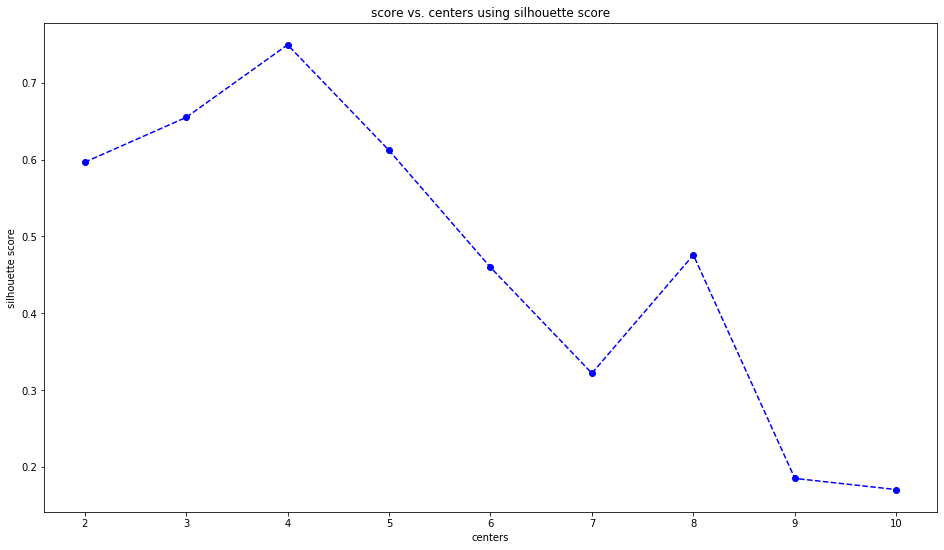

In [12]:
#https://stackoverflow.com/questions/51382250/valueerror-number-of-labels-is-1-valid-values-are-2-to-n-samples-1-inclusiv
#the above link is about exc "silhouette_score Number of labels is 1. Valid values are 2"
#
from sklearn.metrics import silhouette_score
score = np.empty((0,9), float)
centers = np.empty((0,9), int)
for k in range(2,11):
    kmeans_k = KMeans(n_clusters=k)
    model_k = kmeans_k.fit(data)
    labels_k = model_k.predict(data)
#    print('labels shape ', labels_k.shape)
#    print('data shape ', data.shape)
    sa = silhouette_score(data, labels_k)
    score = np.append(score, sa)
    centers = np.append(centers, k)
    print('model ',k,' score= ',sa)
print(score)
print(centers)
plt.plot(centers, score, linestyle='--', marker='o', color='b');
plt.xlabel('centers');
plt.ylabel('silhouette score');
plt.title('score vs. centers using silhouette score');

In [ ]:
# Run our solution
centers, scores = h.fit_mods()

#Your plot should look similar to the below
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('SSE');
plt.title('SSE vs. K');

`7.` Using the scree plot, how many clusters would you suggest as being in the data?  What is K?

In [ ]:
value_for_k = 4 #what does the plot suggest for k?

# Test your solution against ours
display.HTML(t.test_question_7(value_for_k))

In [ ]:
print(data.head())